In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numba import njit
import math

In [334]:
# Use radii 1 - n_radii
r_min = 10
n_radii = 200

alpha = 4.5

In [335]:
# Create our range of r's
radii = np.zeros(n_radii)

In [336]:
# @njit
# def calc_n_add(r, alpha, r_min):
#     return 1 - (r_min / r)**alpha

# @njit
# def calc_n_remove(r, n_less_than_r, alpha, r_min):
#     # return -n_less_than_r * alpha * np.pi * r_min**alpha * r**(-alpha + 2) / (-alpha + 2)
#     return n_less_than_r * r**(-alpha + 2) 

@njit
def calc_n_add(r, alpha, r_min):
    return alpha * r_min**alpha / r ** (alpha + 1)

@njit
def calc_n_remove(r, n_less_than_r, alpha, r_min):
    return n_less_than_r * r**(-alpha + 2)
    # return n_less_than_r * alpha * np.pi * r_min**alpha * r**(-alpha + 2) / (alpha - 2) / 1e3
    

@njit
def update_one(radii, r_min, alpha):
    for idx in range(n_radii):
        r = idx + r_min + 1

        radii[idx] += calc_n_add(r, alpha, r_min)
        radii[idx] -= calc_n_remove(r, radii[idx], alpha, r_min)
        if radii[idx] < 0:
            radii[idx] = 0
            
        # print(f"t = {x}, r = {idx + r_min}, Add {added:.3f}, remove {removed:.3f}")
        # radii[idx] += added - removed
        

In [337]:
counter = 1
n_steps = 4000

In [338]:
while True:
    update_one(radii, r_min, alpha)
        
    counter += 1
    # if counter % 1000000 == 0:
    #     print(radii)
    if counter == n_steps:
        break

In [339]:
counter

4000

In [340]:
step = 10
n_add = calc_n_add(r_min + 1 + step, alpha, r_min)
n_remove = calc_n_remove(r_min + 1 + step, radii[step], alpha, r_min)

print(f"Add: {n_add}, remove: {n_remove}")

Add: 0.007603374688923202, remove: 0.006549600204162453


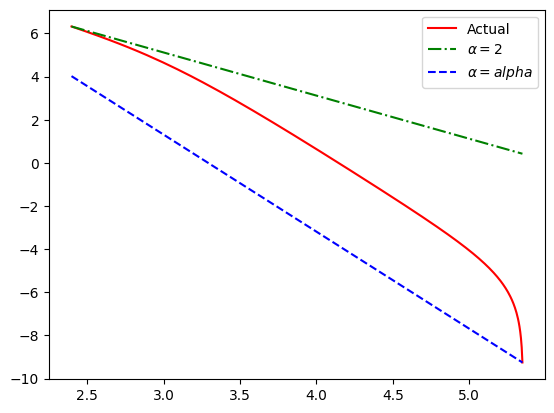

In [341]:
x = r_min + 1 + np.arange(n_radii)
r = np.flip(np.cumsum(np.flip(radii)))
plt.plot(
    np.log(x),
    np.log(r),
    c="r",
    label="Actual"
)

a = 2
plt.plot(
    np.log(x),
    np.log(x[0]**a/x**a * r[0]),
    c="g",
    ls="-.",
    label=f"$\\alpha = {a}$"
)

# plt.plot(
#     np.log(x),
#     np.log(x[0]**alpha/x**alpha * r[0]),
#     c="b",
#     ls="--",
#     label="$\\alpha = {alpha}$"
# )


plt.plot(
    np.log(x),
    np.log(x[-1]**alpha/x**alpha * r[-1]),
    c="b",
    ls="--",
    label="$\\alpha = {alpha}$"
)

plt.legend()

In [342]:
(x[0]**a/x**a * r[0] - r)

array([ 0.        , 17.8219663 , 30.85762069, 40.58453672, 47.90434237,
       53.37907121, 57.37639223, 60.15754542, 61.92666236, 62.85547362,
       63.09403761, 62.7746386 , 62.01300321, 60.90888697, 59.54684199,
       57.99735093, 56.31825272, 54.55631515, 52.74882099, 50.92507176,
       49.10775238, 47.31413049, 45.55708561, 43.8459763 , 42.18736067,
       40.5855883 , 39.04328216, 37.56172816, 36.14118791, 34.78114849,
       33.48052086, 32.2377967 , 31.05117169, 29.91864191, 28.83807875,
       27.80728662, 26.82404712, 25.88615237, 24.99142983, 24.13776043,
       23.32309142, 22.54544515, 21.80292462, 21.09371663, 20.41609303,
       19.76841051, 19.14910941, 18.55671166, 17.98981829, 17.44710642,
       16.92732611, 16.42929703, 15.95190508, 15.494099  , 15.05488702,
       14.63333362, 14.22855637, 13.83972289, 13.46604792, 13.10679058,
       12.76125173, 12.42877146, 12.10872672, 11.80052916, 11.50362294,
       11.21748286, 10.94161242, 10.67554213, 10.41882789, 10.17

In [343]:
r

array([5.56094440e+02, 4.49451834e+02, 3.67292836e+02, 3.02718663e+02,
       2.51150890e+02, 2.09462441e+02, 1.75452076e+02, 1.47519699e+02,
       1.24465103e+02, 1.05363094e+02, 8.94851624e+01, 7.62489713e+01,
       6.51844017e+01, 5.59095630e+01, 4.81130415e+01, 4.15402633e+01,
       3.59827448e+01, 3.12694848e+01, 2.72600104e+01, 2.38387362e+01,
       2.09103821e+01, 1.83962476e+01, 1.62311855e+01, 1.43611407e+01,
       1.27411513e+01, 1.13337228e+01, 1.01075047e+01, 9.03621311e+00,
       8.09775173e+00, 7.27349351e+00, 6.54769283e+00, 5.90700330e+00,
       5.34008153e+00, 4.83726056e+00, 4.39028036e+00, 3.99206461e+00,
       3.63653558e+00, 3.31846013e+00, 3.03332119e+00, 2.77721045e+00,
       2.54673834e+00, 2.33895840e+00, 2.15130365e+00, 1.98153275e+00,
       1.82768455e+00, 1.68803949e+00, 1.56108671e+00, 1.44549618e+00,
       1.34009472e+00, 1.24384558e+00, 1.15583090e+00, 1.07523658e+00,
       1.00133937e+00, 9.33495536e-01, 8.71131256e-01, 8.13734148e-01,
      